In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("AirQualityUCI_average_of_the_day.csv")
df.head()

,DATE,CO.R,CO.T,NMHC.R,NMHC.T,NOx.R,NOx.T,NO2.R,NO2.T,C6H6.R,O3.T,T,RH,AH
0,38056,1.966667,1316.500000,86.500000,912.250000,132.000000,1167.250000,108.833333,1545.333333,8.460790,1096.041667,12.020833,54.883334,0.765626
1,38057,2.179444,1244.062500,104.500000,851.802083,140.068056,1277.187500,99.716667,1522.697917,7.989058,885.031250,9.833333,64.069791,0.775768
2,38058,2.734722,1281.562500,156.062500,1008.229167,170.122222,1101.718750,108.893056,1627.218750,12.129509,1084.218750,11.292708,51.107292,0.663102
3,38059,2.645833,1330.555556,139.250000,992.822917,181.293056,993.159722,117.006944,1595.621528,10.922887,1245.781250,12.866319,51.530903,0.732294
4,38060,2.442361,1360.927083,116.958333,943.854167,144.952778,1001.104167,111.131944,1602.187500,9.631442,1234.177083,16.016667,48.843750,0.849674


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    391 non-null    int64  
 1   CO.R    391 non-null    float64
 2   CO.T    391 non-null    float64
 3   NMHC.R  391 non-null    float64
 4   NMHC.T  391 non-null    float64
 5   NOx.R   391 non-null    float64
 6   NOx.T   391 non-null    float64
 7   NO2.R   391 non-null    float64
 8   NO2.T   391 non-null    float64
 9   C6H6.R  391 non-null    float64
 10  O3.T    391 non-null    float64
 11  T       391 non-null    float64
 12  RH      391 non-null    float64
 13  AH      391 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 42.9 KB


# CO.T

<AxesSubplot:>

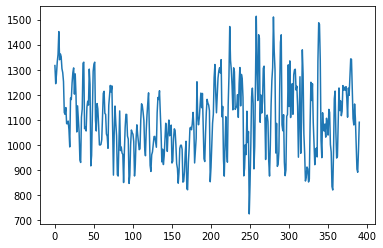

In [177]:
df['CO.T'].plot()

In [178]:
df['CO.T_last_month']=df['CO.T'].shift(1)
df['CO.T_last_2months']=df['CO.T'].shift(2)
df['CO.T_last_3months']=df['CO.T'].shift(3)

In [179]:
df.head()

,DATE,CO.R,CO.T,NMHC.R,NMHC.T,NOx.R,NOx.T,NO2.R,NO2.T,C6H6.R,O3.T,T,RH,AH,CO.T_last_month,CO.T_last_2months,CO.T_last_3months
0,38056,1.966667,1316.500000,86.500000,912.250000,132.000000,1167.250000,108.833333,1545.333333,8.460790,1096.041667,12.020833,54.883334,0.765626,NaN,NaN,NaN
1,38057,2.179444,1244.062500,104.500000,851.802083,140.068056,1277.187500,99.716667,1522.697917,7.989058,885.031250,9.833333,64.069791,0.775768,1316.500000,NaN,NaN
2,38058,2.734722,1281.562500,156.062500,1008.229167,170.122222,1101.718750,108.893056,1627.218750,12.129509,1084.218750,11.292708,51.107292,0.663102,1244.062500,1316.5000,NaN
3,38059,2.645833,1330.555556,139.250000,992.822917,181.293056,993.159722,117.006944,1595.621528,10.922887,1245.781250,12.866319,51.530903,0.732294,1281.562500,1244.0625,1316.5000
4,38060,2.442361,1360.927083,116.958333,943.854167,144.952778,1001.104167,111.131944,1602.187500,9.631442,1234.177083,16.016667,48.843750,0.849674,1330.555556,1281.5625,1244.0625


In [180]:
df_CO=df.dropna()

In [181]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [182]:
x1=df_CO['CO.T_last_month']
x2=df_CO['CO.T_last_2months']
x3=df_CO['CO.T_last_3months']
y=df_CO['CO.T']

In [183]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [184]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [185]:
x=np.concatenate([x1,x2,x3],axis=1)

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [187]:
model=LR.fit(x_train,y_train)

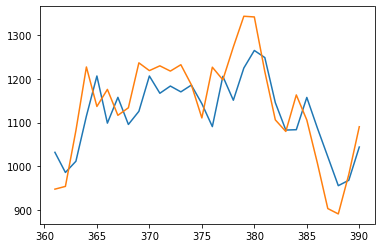

In [171]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [191]:
model.coef_

array([ 0.84329998, -0.24287922,  0.02852975])

In [189]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

71.67099131986448

# NMHC.T

<AxesSubplot:>

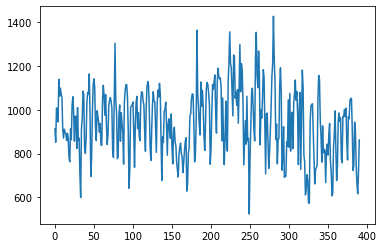

In [193]:
df['NMHC.T'].plot()

In [194]:
df['NMHC.T_last_month']=df['NMHC.T'].shift(1)
df['NMHC.T_last_2months']=df['NMHC.T'].shift(2)
df['NMHC.T_last_3months']=df['NMHC.T'].shift(3)

In [195]:
df_NMHC=df.dropna()

In [196]:
x1=df_NMHC['NMHC.T_last_month']
x2=df_NMHC['NMHC.T_last_2months']
x3=df_NMHC['NMHC.T_last_3months']
y=df_NMHC['NMHC.T']

In [197]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [198]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [199]:
x=np.concatenate([x1,x2,x3],axis=1)

In [200]:
x=pd.DataFrame(x)

In [201]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [202]:
model=LR.fit(x_train,y_train)

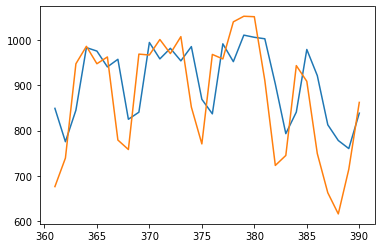

In [203]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [204]:
model.coef_

array([ 0.7094754 , -0.16609705, -0.00604368])

In [205]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

99.59171561483888

# NOx.T

<AxesSubplot:>

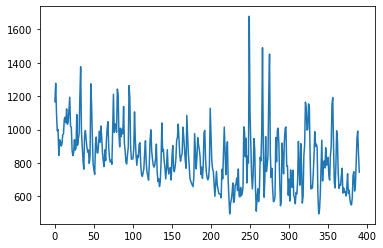

In [206]:
df['NOx.T'].plot()

In [207]:
df['NOx.T_last_month']=df['NOx.T'].shift(1)
df['NOx.T_last_2months']=df['NOx.T'].shift(2)
df['NOx.T_last_3months']=df['NOx.T'].shift(3)

In [208]:
df_NO=df.dropna()

In [209]:
x1=df_NO['NOx.T_last_month']
x2=df_NO['NOx.T_last_2months']
x3=df_NO['NOx.T_last_3months']
y=df_NO['NOx.T']

In [210]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [211]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [212]:
x=np.concatenate([x1,x2,x3],axis=1)

In [213]:
x=pd.DataFrame(x)

In [214]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [215]:
model=LR.fit(x_train,y_train)

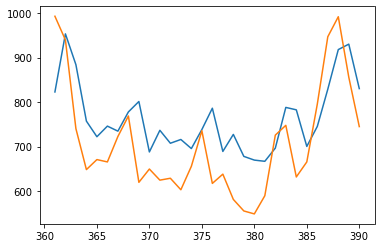

In [216]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [217]:
model.coef_

array([ 0.7239497 , -0.16888476,  0.04010433])

In [218]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

97.86077960099504

# NO2

<AxesSubplot:>

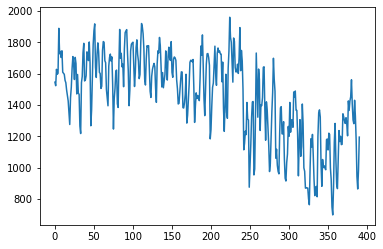

In [219]:
df['NO2.T'].plot()

In [220]:
df['NO2.T_last_month']=df['NO2.T'].shift(1)
df['NO2.T_last_2months']=df['NO2.T'].shift(2)
df['NO2.T_last_3months']=df['NO2.T'].shift(3)

In [221]:
df_NO2=df.dropna()

In [222]:
x1=df_NO2['NO2.T_last_month']
x2=df_NO2['NO2.T_last_2months']
x3=df_NO2['NO2.T_last_3months']
y=df_NO2['NO2.T']

In [223]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [224]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [225]:
x=np.concatenate([x1,x2,x3],axis=1)

In [226]:
x=pd.DataFrame(x)

In [227]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [228]:
model=LR.fit(x_train,y_train)

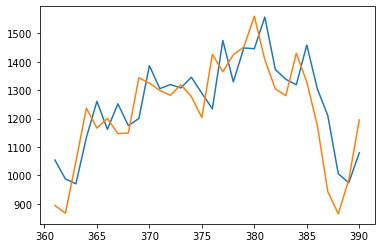

In [229]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [230]:
model.coef_

array([ 1.00889058, -0.32038272,  0.17824253])

In [231]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

110.94959771476037

# C6H6

<AxesSubplot:>

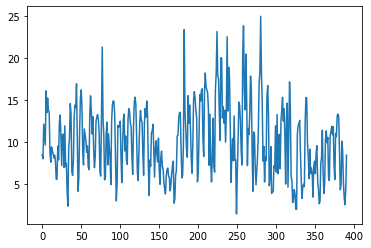

In [232]:
df['C6H6.R'].plot()

In [233]:
df['C6H6.R_last_month']=df['C6H6.R'].shift(1)
df['C6H6.R_last_2months']=df['C6H6.R'].shift(2)
df['C6H6.R_last_3months']=df['C6H6.R'].shift(3)

In [234]:
df_C6H6=df.dropna()

In [235]:
x1=df_C6H6['C6H6.R_last_month']
x2=df_C6H6['C6H6.R_last_2months']
x3=df_C6H6['C6H6.R_last_3months']
y=df_C6H6['C6H6.R']

In [236]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [237]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [238]:
x=np.concatenate([x1,x2,x3],axis=1)

In [239]:
x=pd.DataFrame(x)

In [240]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [241]:
model=LR.fit(x_train,y_train)

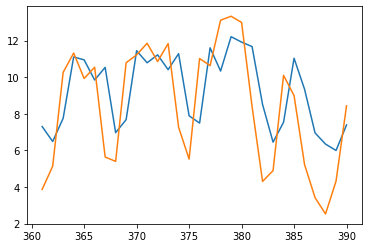

In [242]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [243]:
model.coef_

array([ 0.70184427, -0.17773858,  0.01190502])

In [244]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

2.5548110968375006

# O3

<AxesSubplot:>

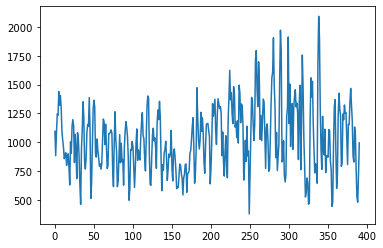

In [245]:
df['O3.T'].plot()

In [246]:
df['O3.T_last_month']=df['O3.T'].shift(1)
df['O3.T_last_2months']=df['O3.T'].shift(2)
df['O3.T_last_3months']=df['O3.T'].shift(3)

In [247]:
df_O3=df.dropna()

In [248]:
x1=df_O3['O3.T_last_month']
x2=df_O3['O3.T_last_2months']
x3=df_O3['O3.T_last_3months']
y=df_O3['O3.T']

In [249]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [250]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [251]:
x=np.concatenate([x1,x2,x3],axis=1)

In [252]:
x=pd.DataFrame(x)

In [253]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [254]:
model=LR.fit(x_train,y_train)

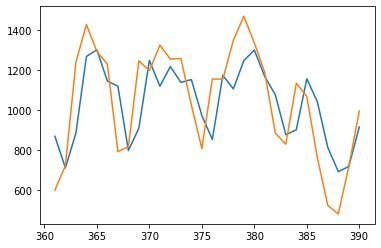

In [255]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [256]:
model.coef_

array([ 0.77510239, -0.21076319, -0.02459354])

In [257]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

188.42834634425128

# T

<AxesSubplot:>

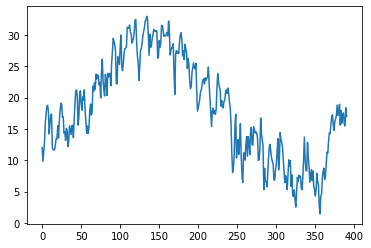

In [258]:
df['T'].plot()

In [259]:
df['T_last_month']=df['T'].shift(1)
df['T_last_2months']=df['T'].shift(2)
df['T_last_3months']=df['T'].shift(3)

In [260]:
df_T=df.dropna()

In [261]:
x1=df_T['T_last_month']
x2=df_T['T_last_2months']
x3=df_T['T_last_3months']
y=df_T['T']

In [262]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [263]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [264]:
x=np.concatenate([x1,x2,x3],axis=1)

In [265]:
x=pd.DataFrame(x)

In [266]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [267]:
model=LR.fit(x_train,y_train)

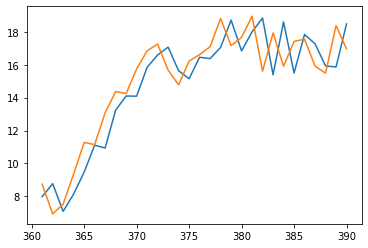

In [268]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [269]:
model.coef_

array([ 0.98512111, -0.20232147,  0.19278256])

In [270]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

1.517593456650698

# RH

<AxesSubplot:>

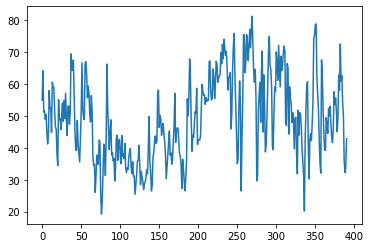

In [4]:
df['RH'].plot()

In [5]:
df['RH_last_month']=df['RH'].shift(1)
df['RH_last_2months']=df['RH'].shift(2)
df['RH_last_3months']=df['RH'].shift(3)

In [6]:
df_RH=df.dropna()

In [8]:
x1=df_RH['RH_last_month']
x2=df_RH['RH_last_2months']
x3=df_RH['RH_last_3months']
y=df_RH['RH']

In [9]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [10]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [11]:
x=np.concatenate([x1,x2,x3],axis=1)

In [12]:
x=pd.DataFrame(x)

In [13]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [15]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [16]:
model=LR.fit(x_train,y_train)

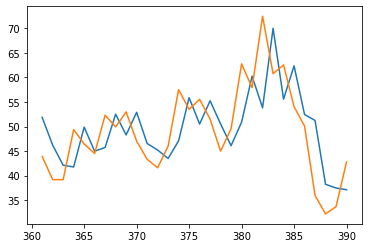

In [17]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [18]:
model.coef_

array([ 0.87666494, -0.22805842,  0.1766793 ])

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

7.169827830279951

# AH

<AxesSubplot:>

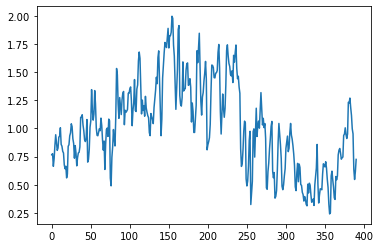

In [20]:
df['AH'].plot()

In [21]:
df['AH_last_month']=df['AH'].shift(1)
df['AH_last_2months']=df['AH'].shift(2)
df['AH_last_3months']=df['AH'].shift(3)

In [23]:
df_AH=df.dropna()

In [24]:
x1=df_AH['AH_last_month']
x2=df_AH['AH_last_2months']
x3=df_AH['AH_last_3months']
y=df_AH['AH']

In [25]:
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)

In [26]:
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)

In [27]:
x=np.concatenate([x1,x2,x3],axis=1)

In [28]:
x=pd.DataFrame(x)

In [29]:
x_train,x_test,y_train,y_test=x[:-30],x[-30:],y[:-30],y[-30:]

In [30]:
model=LR.fit(x_train,y_train)

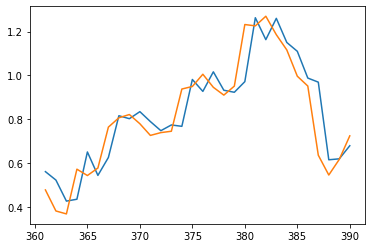

In [31]:
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred=pred.set_index([pd.Index([361,362,363,364,365,366,367,368,369,370,371 ,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387 ,388,389,390])])
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)

In [32]:
model.coef_

array([ 1.11063155, -0.35538048,  0.16400157])

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

0.10814573424026862